In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from pandas_profiling import ProfileReport
import matplotlib.patches as mpatches

pd.set_option("display.max_rows", 500)
%matplotlib inline
from termcolor import colored
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [100]:
font = {'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)

In [101]:
# Reading events data
df = pd.read_csv(r"/Users/sharvarinagesh/Documents/data science/INSAID/Projects/CapStoneProject/Data/final_dataset.csv")
df.head()

,Unnamed: 0,EventID,DeviceID,Timestamp,Longitude,Latitude,Place,State,City_or_Municipality,Gender,Age,Age_group,Mobile_Brand,Mobile_Model
0,0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3
1,1,1355198,2973347786994914304,2016-05-01 01:35:45,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3
2,2,1630972,2973347786994914304,2016-05-03 00:07:34,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3
3,3,2732453,2973347786994914304,2016-05-01 06:15:59,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3
4,4,1562542,2973347786994914304,2016-05-01 20:34:19,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127005 entries, 0 to 1127004
Data columns (total 14 columns):
Unnamed: 0              1127005 non-null int64
EventID                 1127005 non-null int64
DeviceID                1127005 non-null int64
Timestamp               1127005 non-null object
Longitude               1127005 non-null float64
Latitude                1127005 non-null float64
Place                   1127005 non-null object
State                   1127005 non-null object
City_or_Municipality    1127005 non-null object
Gender                  1127005 non-null object
Age                     1127005 non-null int64
Age_group               1127005 non-null object
Mobile_Brand            1127005 non-null object
Mobile_Model            1127005 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 120.4+ MB


In [103]:
df.describe()

,Unnamed: 0,EventID,DeviceID,Longitude,Latitude,Age
count,1.127005e+06,1.127005e+06,1.127005e+06,1.127005e+06,1.127005e+06,1.127005e+06
mean,5.635020e+05,1.624376e+06,4.658227e+18,7.858329e+01,2.247584e+01,3.270192e+01
std,3.253385e+05,9.410575e+05,2.627443e+18,1.682279e+00,7.691152e+00,9.634480e+00
min,0.000000e+00,2.000000e+00,7.392017e+14,7.670098e+01,8.190110e+00,6.000000e+00
25%,2.817510e+05,8.079520e+05,2.357201e+18,7.726896e+01,1.314918e+01,2.600000e+01
50%,5.635020e+05,1.627658e+06,4.800771e+18,7.730512e+01,2.869972e+01,3.100000e+01
75%,8.452530e+05,2.439325e+06,6.823171e+18,8.030927e+01,2.873890e+01,3.800000e+01
max,1.127004e+06,3.252950e+06,9.222957e+18,9.403646e+01,3.084432e+01,9.400000e+01


In [104]:
# Separating User data by dropping duplicate events record. This way we get to see only the user details. 
ageModelData = df.dropna(subset=['Place','State','City_or_Municipality','Gender','Age','Age_group','Mobile_Brand','Mobile_Model']).drop_duplicates('DeviceID')[['DeviceID','Place','State','City_or_Municipality','Gender','Age','Age_group','Mobile_Brand','Mobile_Model']]
ageModelData.head()

,DeviceID,Place,State,City_or_Municipality,Gender,Age,Age_group,Mobile_Brand,Mobile_Model
0,2973347786994914304,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3
194,3264499652692492800,Loni,Uttar Pradesh,Ghaziabad,M,24,M23-26,Xiaomi,MI pad
324,5731369272434022400,Tiruvottiyur,Tamil Nadu,Thiruvallur,M,26,M23-26,HTC,One max
3858,5536513450525271040,Tiruvottiyur,Tamil Nadu,Thiruvallur,M,32,M32-38,Xiaomi,Red Rice 2
37284,3020769016382465536,Loni,Uttar Pradesh,Ghaziabad,F,53,F43+,Samsung,Galaxy Mega 5.8


In [105]:
ageModelData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13256 entries, 0 to 1127004
Data columns (total 9 columns):
DeviceID                13256 non-null int64
Place                   13256 non-null object
State                   13256 non-null object
City_or_Municipality    13256 non-null object
Gender                  13256 non-null object
Age                     13256 non-null int64
Age_group               13256 non-null object
Mobile_Brand            13256 non-null object
Mobile_Model            13256 non-null object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [106]:
ageModelData.nunique()

DeviceID                13256
Place                     355
State                       6
City_or_Municipality       97
Gender                      2
Age                        76
Age_group                  12
Mobile_Brand               84
Mobile_Model              969
dtype: int64

In [107]:
#Checking if there are any duplicate device ids in the dataframe.
ageModelData.groupby(level=0).filter(lambda x: len(x) > 1)

,DeviceID,Place,State,City_or_Municipality,Gender,Age,Age_group,Mobile_Brand,Mobile_Model


## State Wise Data Count

In [108]:
ageModelData.State.value_counts()

Uttar Pradesh        7322
Tamil Nadu           5803
Tripura                36
Chandigarh             33
Arunachal Pradesh      32
Manipur                30
Name: State, dtype: int64

In [109]:
ageModelData.State.value_counts(normalize=True).mul(100)

Uttar Pradesh        55.235365
Tamil Nadu           43.776403
Tripura               0.271575
Chandigarh            0.248944
Arunachal Pradesh     0.241400
Manipur               0.226313
Name: State, dtype: float64

Text(0.5, 1.0, 'Customer Count from Different states')

<Figure size 1440x1440 with 0 Axes>

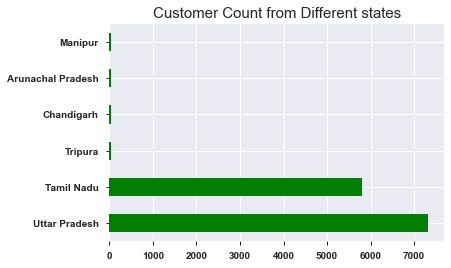

In [110]:
fig = plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, 1)
ageModelData.State.value_counts().sort_values( ascending = False).plot(kind='barh', color='green')
plt.title('Customer Count from Different states',size = 15)

**Observation** : from the chart and from the percentage of users, it is very clear that 99% of the users are from UP(55.2%) and TN(43.8%). Tripura(0.27%), Chandigarh(0.24%), Arunachal Pradesh(0.24%) and Manipur(0.22%) constitute 1% of the users. 

In [13]:
df.State.value_counts()

Uttar Pradesh        687387
Tamil Nadu           436290
Manipur                 989
Tripura                 892
Chandigarh              839
Arunachal Pradesh       608
Name: State, dtype: int64

In [14]:
df.State.value_counts(normalize=True).mul(100)

Uttar Pradesh        60.992365
Tamil Nadu           38.712339
Manipur               0.087755
Tripura               0.079148
Chandigarh            0.074445
Arunachal Pradesh     0.053948
Name: State, dtype: float64

Text(0.5, 1.0, 'Customer Count from Different states')

<Figure size 1440x1440 with 0 Axes>

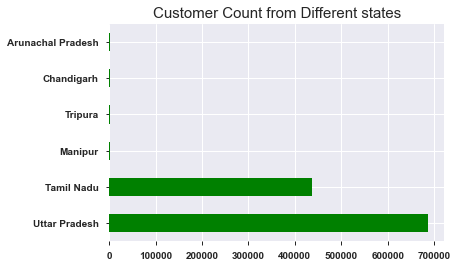

In [111]:
fig = plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, 1)
df.State.value_counts().sort_values( ascending = False).plot(kind='barh', color='green')
plt.title('Customer Count from Different states',size = 15)

**Observation** : from the chart and from the percentage of events, it is very clear that 98% of the events are from UP(60.99%) and TN(38.71%). Tripura(0.079%), Chandigarh(0.074%), Arunachal Pradesh(0.053%) and Manipur(0.087%) constitute around 2% of the events. so 55% of total users are from UP and contribute to 60.9% of events.  

In [26]:
#How many days' data do we have?
print(df.Timestamp.min())
print(df.Timestamp.max())

2016-04-30 23:52:26
2016-05-07 23:59:50


**Observations**: We have one week's data between 2016-04-30 23:52:26 & 2016-05-07 23:59:50

## Mobile Usage Patterns :

In [120]:
#If we check per event per person from each state:
state_avg_events = []
states = ageModelData.State.unique()
for state in states:
    total_events = df[df.State == state]['State'].count()
    total_users = ageModelData[ageModelData.State == state]['State'].count()
    events_per_user = total_events/total_users
    state_avg_events.append(events_per_user)
print(states)
print(state_avg_events)

['Uttar Pradesh' 'Tamil Nadu' 'Tripura' 'Chandigarh' 'Manipur'
 'Arunachal Pradesh']
[93.87967768369298, 75.18352576253662, 24.77777777777778, 25.424242424242426, 32.96666666666667, 19.0]


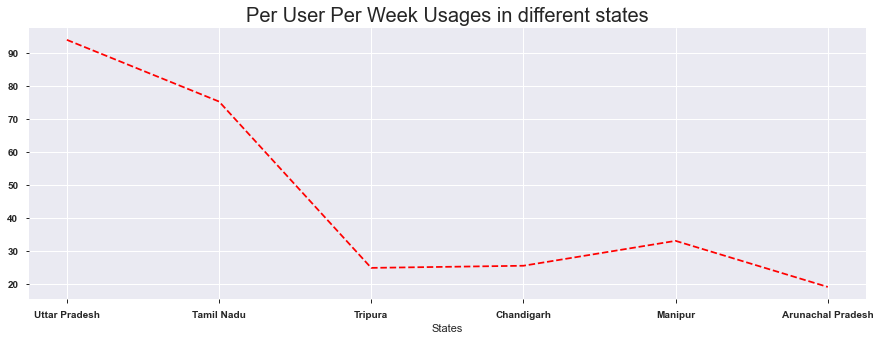

In [121]:
#Let's plot different state's Usage Pattern:
figure = plt.figure(figsize=[15, 5])
plt.title('Per User Per Week Usages in different states',size = 20)
plt.xlabel('States')
plt.plot(states,state_avg_events, 'r--')

**Observations** : From this calculations we can see that in a week, UP user uses the mobile 93 times, TN user uses on an average 75 times whereas Tripura, Chandigarh, Manipur and Arunachalpradesh users use it for 24, 25,32 and 19 times respectively. Arunachal Pradesh user uses the minimum 19 times per week where as UP user uses it the most, 93 times. 

Telecom company can introduce more mobile/data plans to UP and TN users to promote them to buy new plans

In [122]:
# How are male/female users use the mobile ?
avg_events = []
genders = ['M','F']
for gender in ['M','F']:
    total_events = df[df.Gender == gender]['Gender'].count()
    total_users = ageModelData[ageModelData.Gender == gender]['Gender'].count()
    events_per_gender = total_events/total_users
    avg_events.append(events_per_gender)
print(genders)
print(avg_events)


['M', 'F']
[92.5167229926582, 71.25540106951871]


**Observations** : On an average Men use the mobile 92 times a week and women, 71 times

In [123]:
state_avg_events_m = []
state_avg_events_f = []
states = ageModelData.State.unique()
for state in states:
    total_events_m = df[(df.State == state) & (df.Gender == 'M')]['State'].count()
    total_events_f = df[(df.State == state) & (df.Gender == 'F')]['State'].count()
    total_users_m = ageModelData[(ageModelData.State == state) & (ageModelData.Gender == 'M')]['State'].count()
    total_users_f = ageModelData[(ageModelData.State == state) & (ageModelData.Gender == 'F')]['State'].count()
    avg_event_m = total_events_m/total_users_m
    avg_events_f = total_events_f/total_users_f
    state_avg_events_m.append(avg_event_m)
    state_avg_events_f.append(avg_events_f)
print(states)
print(state_avg_events_m)
print(state_avg_events_f)

['Uttar Pradesh' 'Tamil Nadu' 'Tripura' 'Chandigarh' 'Manipur'
 'Arunachal Pradesh']
[100.8965092402464, 82.86005509641873, 18.27777777777778, 23.0, 27.666666666666668, 16.428571428571427]
[79.94331158238172, 62.35987114588127, 31.27777777777778, 29.666666666666668, 45.333333333333336, 23.90909090909091]


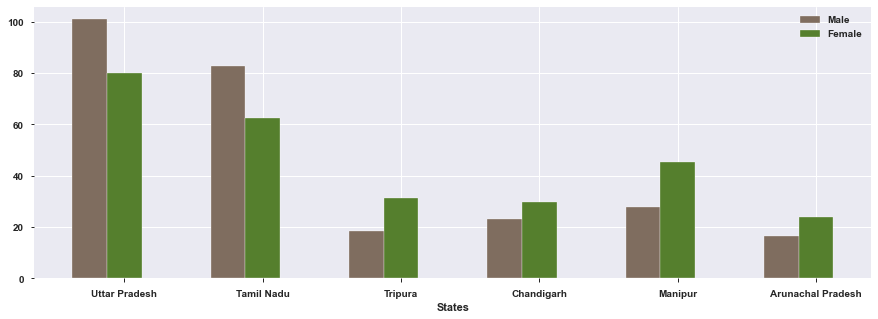

In [124]:
#If we try to draw a chart out of this usage pattern:
barWidth = 0.25

r1 = np.arange(len(state_avg_events_m))
r2 = [x + barWidth for x in r1]

figure = plt.figure(figsize=[15, 5])
# Make the plot
plt.bar(r1, state_avg_events_m, color='#7f6d5f', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, state_avg_events_f, color='#557f2d', width=barWidth, edgecolor='white', label='Female')
 
# Add xticks on the middle of the group bars
plt.xlabel('States', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(state_avg_events_m))], states)
 
# Create legend & Show graphic
plt.legend()
plt.show()


**Observations**: In UP & TN, Men use mobile more than women (100 and 82 vs 79 and 62). But in all other states women use the mobile more than men. 

## Gender Wise Analysis

### Let's check how many Male/Female users are there ?

In [13]:
ageModelData.Gender.value_counts() 

M    8581
F    4675
Name: Gender, dtype: int64

Gender as pie chart:


<Figure size 5400x5400 with 0 Axes>

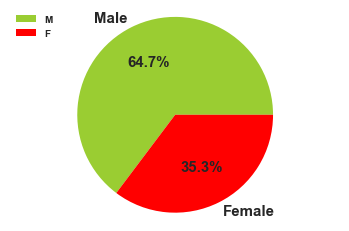

In [15]:
# Pie chart to show Male/Female user ratio

print("Gender as pie chart:")
fig = plt.figure(figsize=(75,75))
fig, ax = plt.subplots(1, 1)
ax.pie(ageModelData.Gender.value_counts(),autopct='%2.1f%%', labels=['Male','Female'], colors=['yellowgreen','r'],textprops={'fontsize': 15})
plt.axis('equal')
plt.ylabel('')


**Observation**: Across the states, there are almost double Male users than Female users in the dataset. While there are 64.7% Male users, only 35.3% are Female users. 

### How is the Male/Female user distribution among the states in focus ?

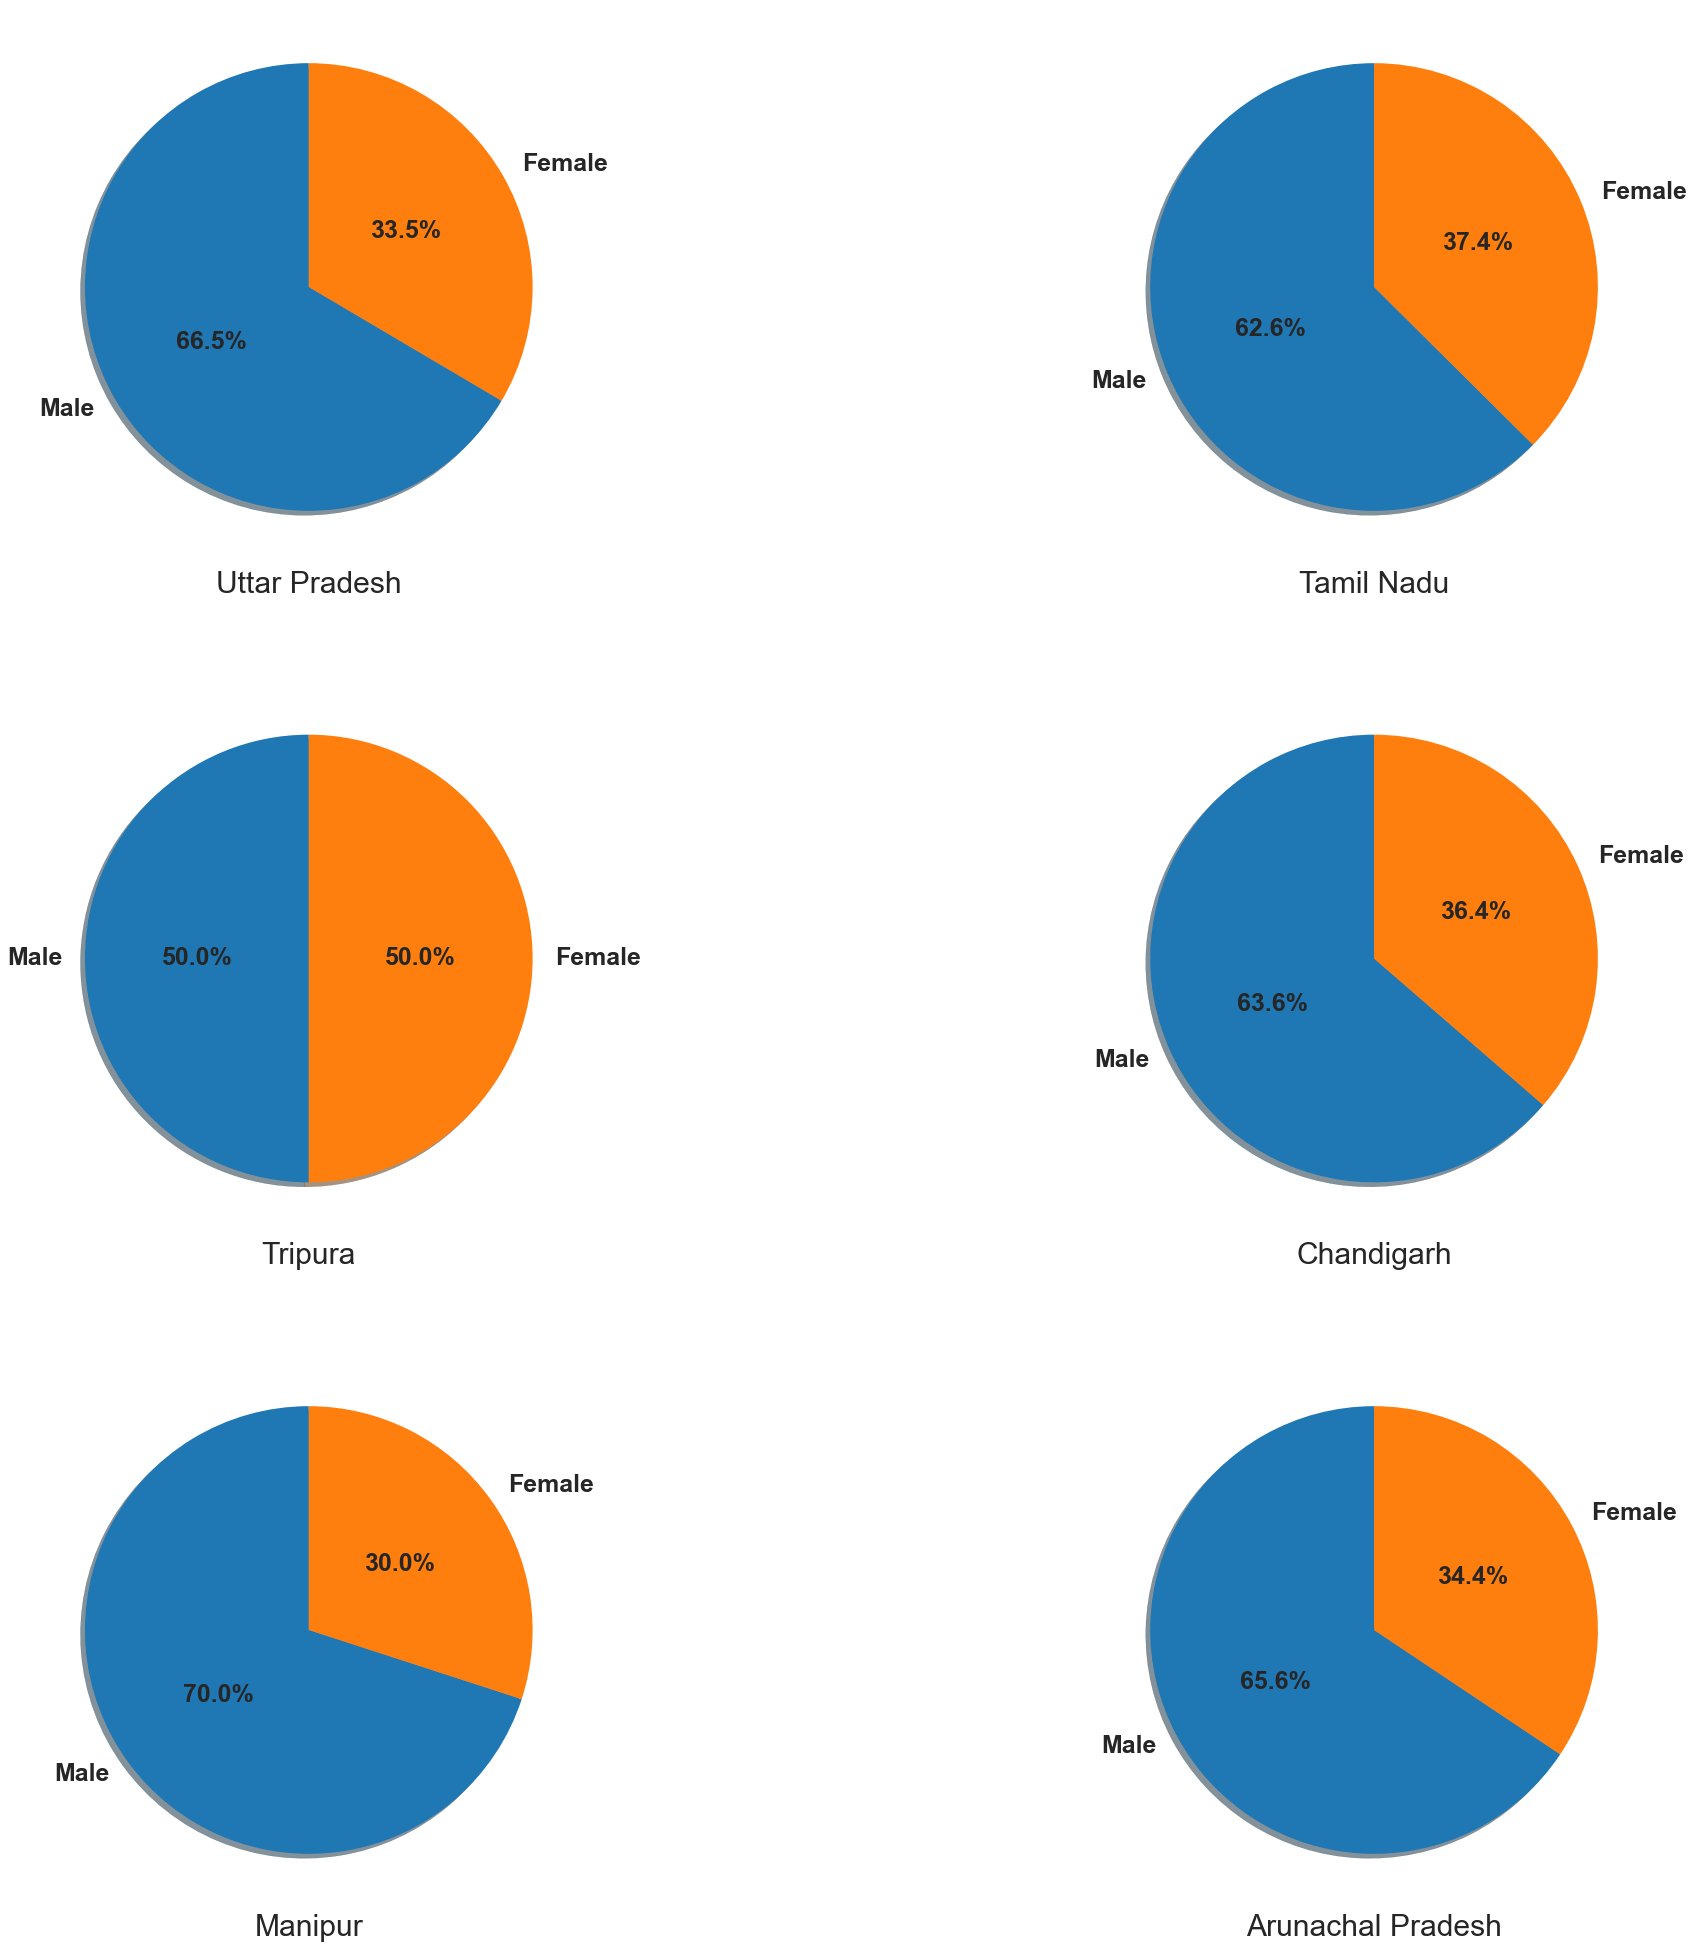

In [15]:
#Statewise distribution of Male/Female users
#ageModelData.groupby('State')['Gender'].value_counts().plot(kind='bar', figsize=(15,7), fontsize=13, 
 #                                                                      color='blue')

fig = plt.figure(figsize=(35,35))
i=1
for state in ageModelData.State.unique():
    fig.add_subplot(3,2,i)            #  subplot 1
    i=i+1
    ageModelData[ageModelData.State == state].Gender.value_counts().plot( kind='pie', autopct='%1.1f%%', 
                                       startangle=90, shadow=True, labels=['Male','Female'], pctdistance=0.5,textprops={'fontsize': 25})
    plt.xlabel(state,fontsize=30)
    plt.ylabel('')
plt.show()

**Observations**: In most of the states there are double the Male users than Female users except in Tripura where both Male and Female users are equal in number.

## AGE Distribution 

### How is the age distribution among users?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

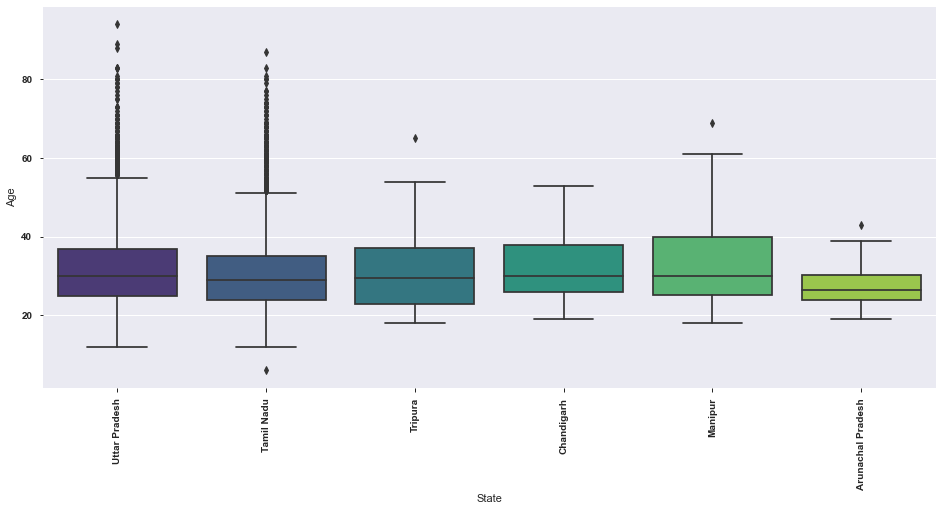

In [22]:
#Which year has more successful movies in terms of revenue?
plt.figure(figsize=(16, 7))
sns.boxplot(data=ageModelData, x='State', y='Age', palette='viridis', width=0.8)
plt.xticks(rotation=90)

**Observation**: 50% of the users across the states are between 25-40. Only Uttar Pradesh and Tamil Nadu have few users above 60 and below 18. Arunachal Pradesh Users are mostly between 20-40.  

### Let's check how old are our Male/Female users  ?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

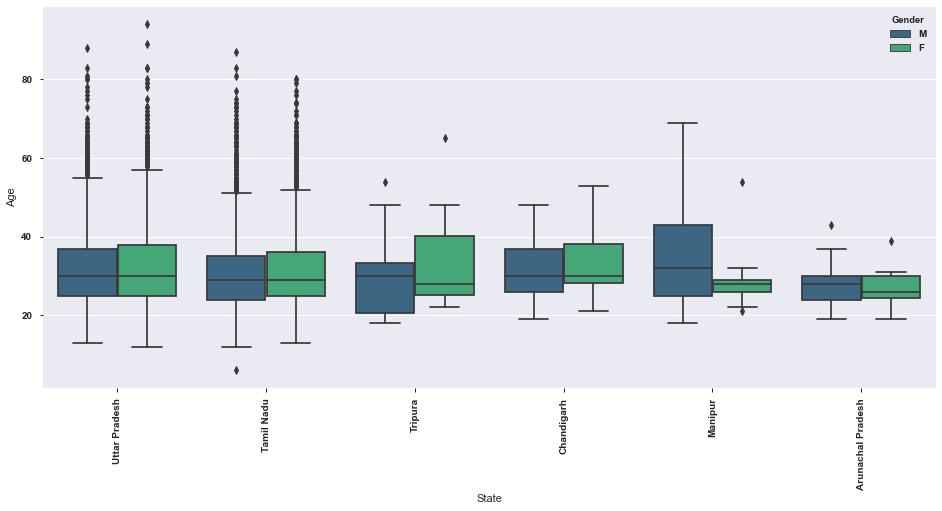

In [23]:
# Distribution of users in various states according to their Age
plt.figure(figsize=(16, 7))
sns.boxplot(data=ageModelData, x='State', y='Age', palette='viridis', width=0.8,hue='Gender')

plt.xticks(rotation=90)

**Observations**: When Comparing Gender vs Age, Uttar Pradesh and Tamil Nadu has almost similar distribution of Male/Female users. Where as Manipur and Arunachal Pradesh has Female User Age is lesser than the Male User Age. Also, Boys start using the phone at a much younger age in the states of Tripura, Chandigarh and Manipur. 

#### If we check the age group distribution:

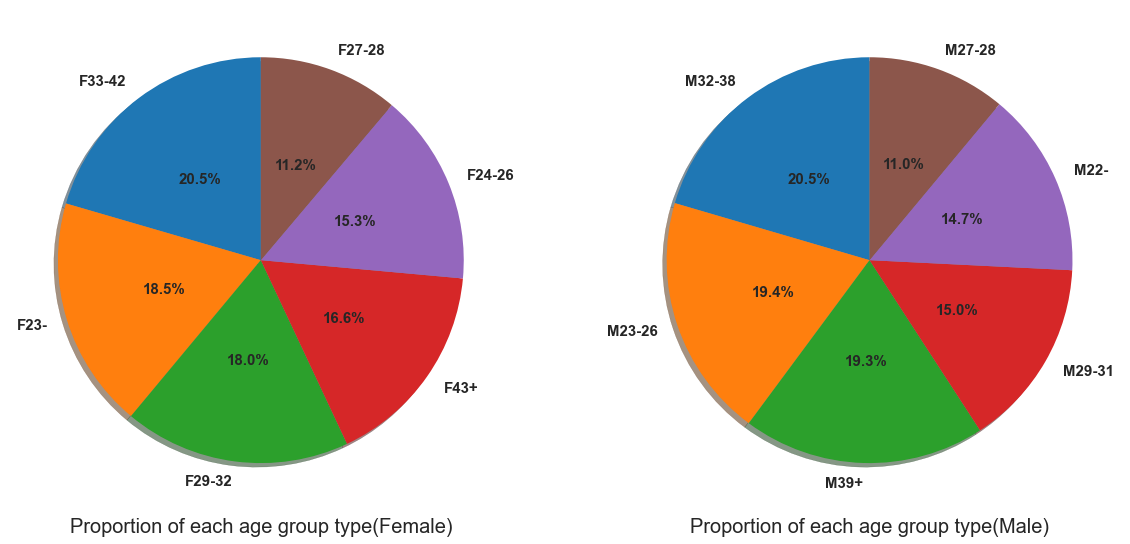

In [24]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
figure = plt.figure(figsize=[20, 20])
plt.subplot(1, 2, 1)

genF = ageModelData[ageModelData.Gender=='F']
genF['Age_group'].value_counts().plot(kind='pie',  autopct='%1.1f%%', 
                                       startangle=90, shadow=True,  pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Female)',  size = 20)
plt.ylabel('')


plt.subplot(1, 2, 2)
genM = ageModelData[ageModelData.Gender=='M']
genM['Age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                       startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Male)',size = 20)
plt.ylabel('')
plt.show()

**Observation** : Since the grouping of ages is not consistent between Male/Female and also each age group consists of unequal no.of years, We will try to regroup them:

### Let us try regrouping the users on their Age

In [112]:
def NewGroup(age, gender):
    ageGroup = {'20-': [0,20], '21-30':[21,30], '31-40':[31,40], '40-60':[40,60],'60+':[60,100]}
    for group in ageGroup:
        if(age>= ageGroup[group][0] and age <= ageGroup[group][1]):
            return ('F' if gender == 'F' else 'M') + group

In [113]:
ageModelData['New_Group'] = ageModelData.apply(lambda x: NewGroup(x.Age,x.Gender), axis =1)
print(ageModelData)

                    DeviceID          Place          State  \
0        2973347786994914304           Loni  Uttar Pradesh   
194      3264499652692492800           Loni  Uttar Pradesh   
324      5731369272434022400   Tiruvottiyur     Tamil Nadu   
3858     5536513450525271040   Tiruvottiyur     Tamil Nadu   
37284    3020769016382465536           Loni  Uttar Pradesh   
...                      ...            ...            ...   
1127000  8997838108653864960    Kattivakkam     Tamil Nadu   
1127001  5807163161835078656    Kattivakkam     Tamil Nadu   
1127002   825033023456413568  Mallasamudram     Tamil Nadu   
1127003  2473948708647244288    George Town     Tamil Nadu   
1127004  4114378901988743680   Tiruvottiyur     Tamil Nadu   

        City_or_Municipality Gender  Age Age_group Mobile_Brand  \
0                  Ghaziabad      M   35    M32-38          Umi   
194                Ghaziabad      M   24    M23-26       Xiaomi   
324              Thiruvallur      M   26    M23-26    

In [114]:
ageModelData['New_Group'].value_counts()

M21-30    4192
M31-40    2400
F21-30    2307
M40-60    1242
F31-40    1159
F40-60     799
M20-       629
F20-       288
F60+       122
M60+       118
Name: New_Group, dtype: int64

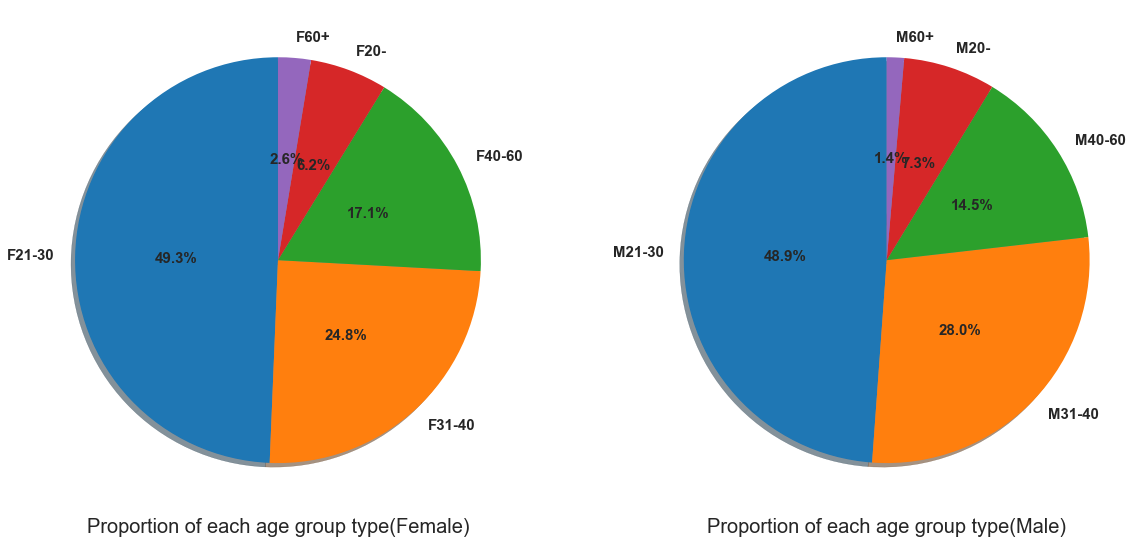

In [115]:
colors_list = ['red', 'green', 'lightcoral', 'blue', 'lightgreen']
figure = plt.figure(figsize=[20, 20])
plt.subplot(1, 2, 1)

genF = ageModelData[ageModelData.Gender=='F']
genF['New_Group'].value_counts().plot(kind='pie',  autopct='%1.1f%%', 
                                       startangle=90, shadow=True,  pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Female)',  size = 20)
plt.ylabel('')


plt.subplot(1, 2, 2)
genM = ageModelData[ageModelData.Gender=='M']
genM['New_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                       startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Male)',size = 20)
plt.ylabel('')
plt.show()

**Observations**: It is very evident that almost 50% of the users, both in Male and Female category are between the age group 21-30. Next biggest category is between 31-40 contributing to almost 1/4th of the telecom customers. Above 40 and under 20 constitute the other 1/4th of customers. So if the telecom company wants to expand, it can focus on age groups, 31-40 and 40-60 to expand.

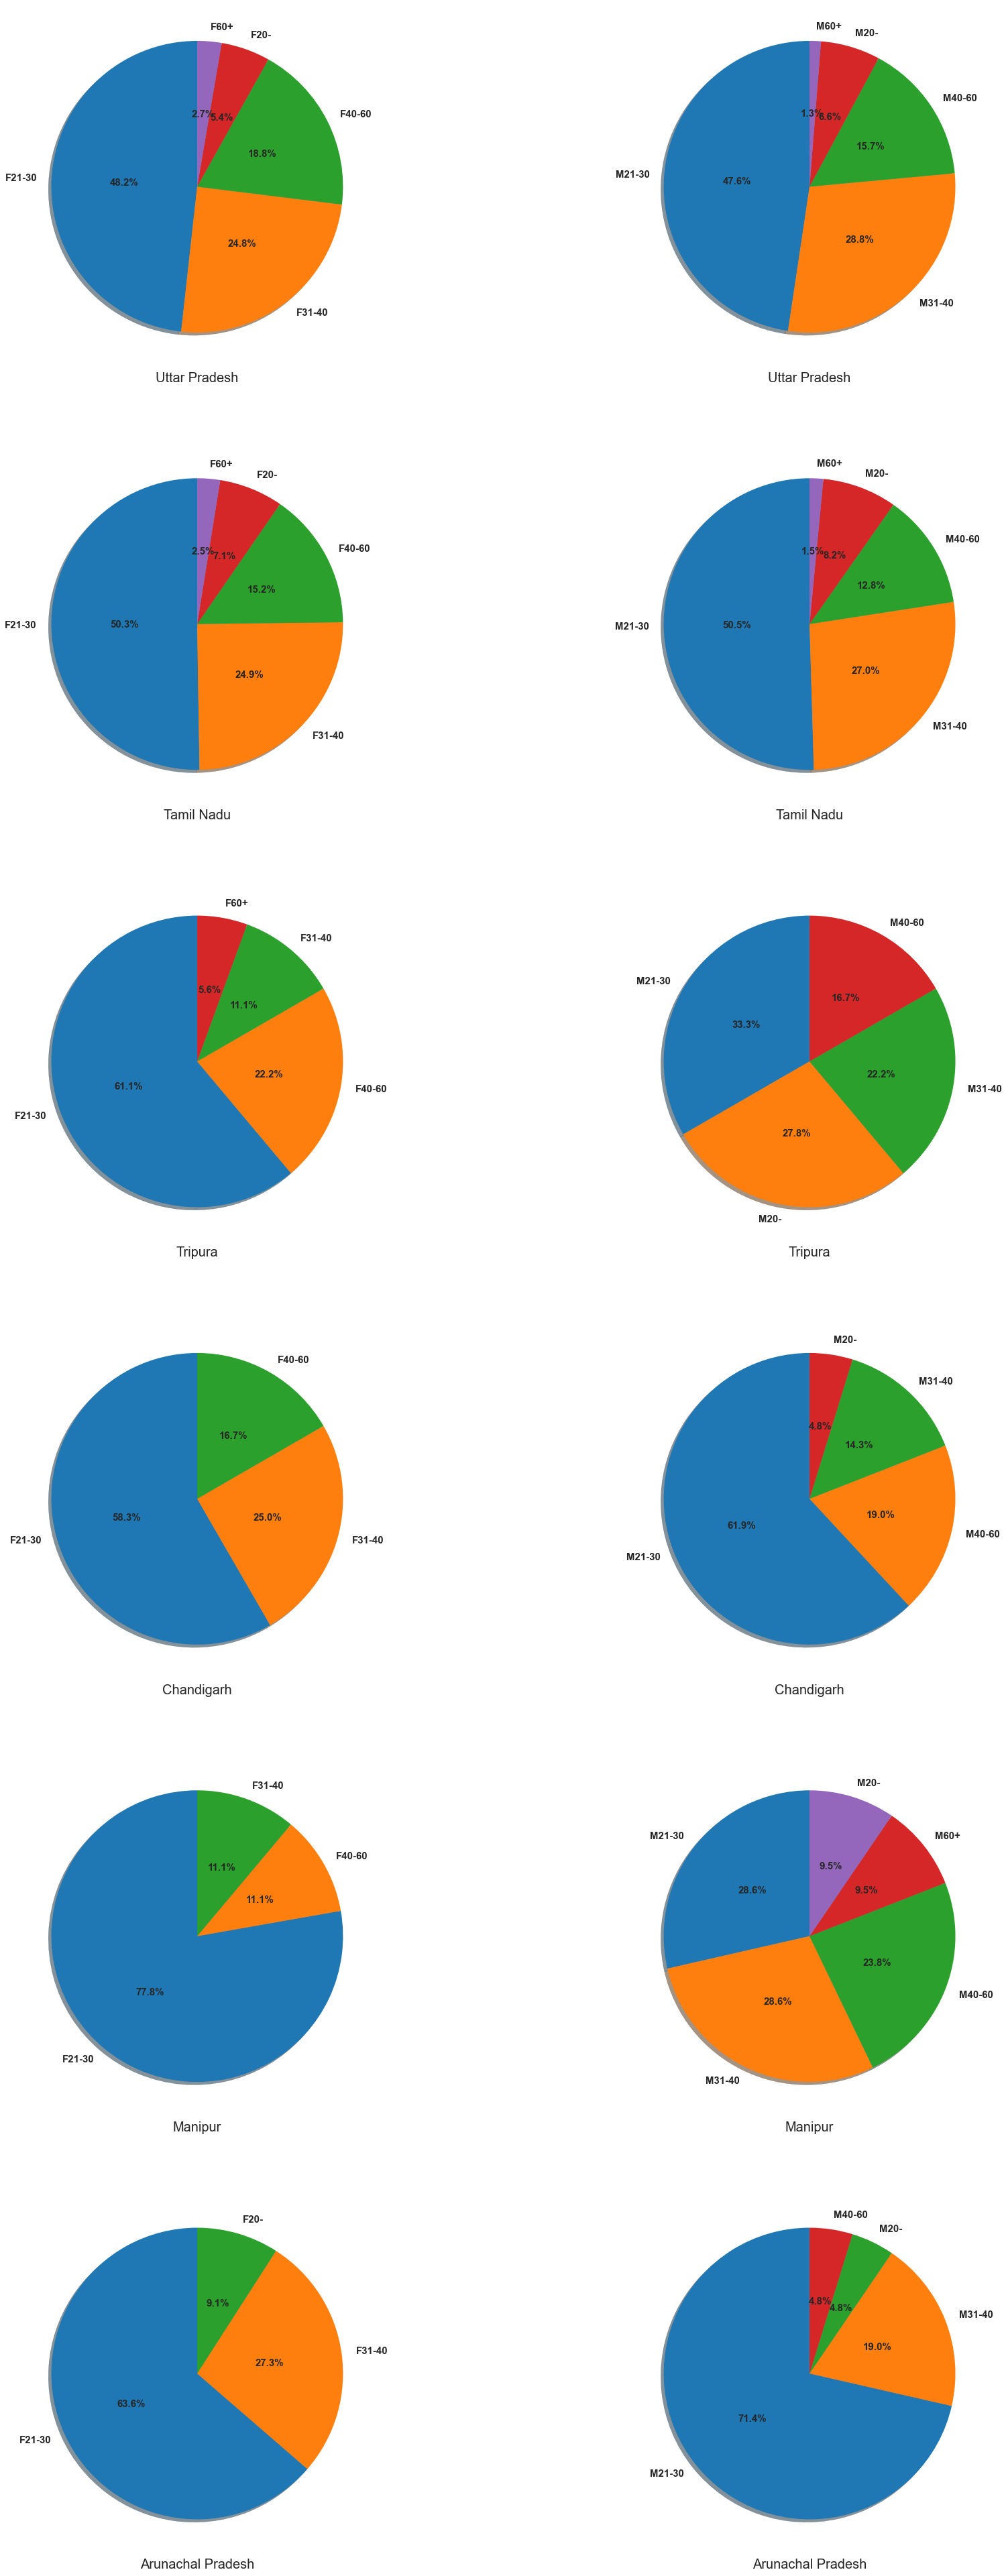

In [119]:
fig = plt.figure(figsize=[30, 70])
i=1
for state in ageModelData.State.unique():
    fig.add_subplot(6,2,i)            #  subplot 1
    i=i+1
    genF = ageModelData[(ageModelData.Gender=='F') & (ageModelData.State == state)]
    genF['New_Group'].value_counts().plot( kind='pie', autopct='%1.1f%%',startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
    plt.xlabel(state,fontsize=20)
    plt.ylabel('')
    
    fig.add_subplot(6,2,i) 
    i=i+1
    genM = ageModelData[(ageModelData.Gender=='M') & (ageModelData.State == state)]
    genM['New_Group'].value_counts().plot( kind='pie', autopct='%1.1f%%',startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
    plt.xlabel(state,fontsize=20)
    plt.ylabel('')
    
    
plt.show()


#genF = ageModelData[ageModelData.Gender=='F']
#genF['New_Group'].value_counts().plot(kind='pie',  autopct='%1.1f%%', 
                                      # startangle=90, shadow=True,  pctdistance=0.5,textprops={'fontsize': 15})
#plt.xlabel('Proportion of each age group type(Female)',  size = 20)
#plt.ylabel('')


#plt.subplot(1, 2, 2)
#genM = ageModelData[ageModelData.Gender=='M']
#genM['New_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                       #startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
#plt.xlabel('Proportion of each age group type(Male)',size = 20)
#plt.ylabel('')

## Analysing the Brands 

#### Which Phone brands are popular among Men and Women

In [62]:
dx = ageModelData['Mobile_Brand'].value_counts().sort_values( ascending = False)
top_ = dx[0:20]
top_.head(20)

Xiaomi          3227
Samsung         2794
Huawei          2376
vivo            1198
OPPO             954
Meizu            841
Cool             643
HTC              202
LeTV             142
Lenovo           135
Nubia            100
LG                51
China Mobile      47
TCL               45
Hammer            40
Umi               36
Hisense           32
Letter            30
One Plus          29
Qiku              27
Name: Mobile_Brand, dtype: int64

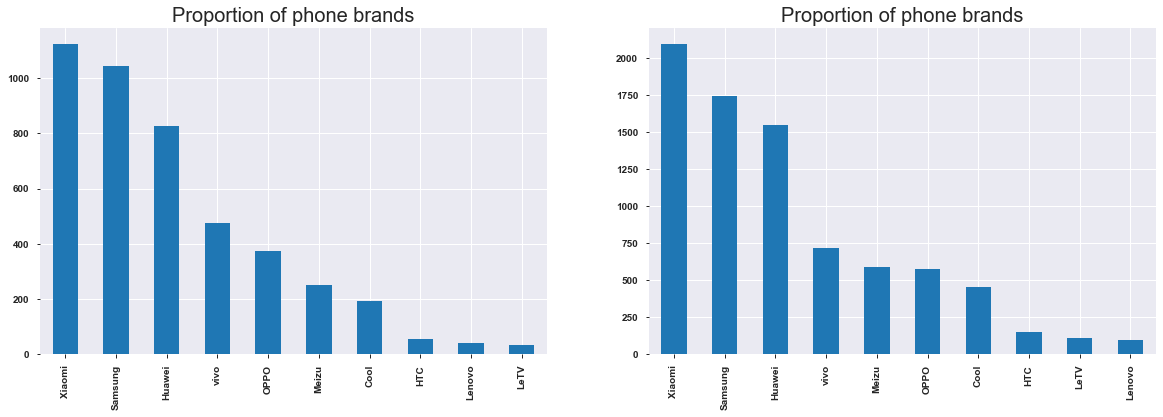

In [83]:
figure = plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
ageModelData[ageModelData.Gender == 'F']['Mobile_Brand'].value_counts().sort_values( ascending = False)[0:10].plot(kind='bar')
plt.title('Proportion of phone brands',size = 20)

plt.subplot(1, 2, 2)
ageModelData[ageModelData.Gender == 'M']['Mobile_Brand'].value_counts().sort_values( ascending = False)[0:10].plot(kind='bar')
plt.title('Proportion of phone brands',size = 20)
plt.show()

**Observations**: Among both Male/Female Users Xiaomi,Samsung,Huawei,vivo,OPPO,Meizu,Cool,HTC,LeTV,Lenovo are the favourite brand in almost the same order

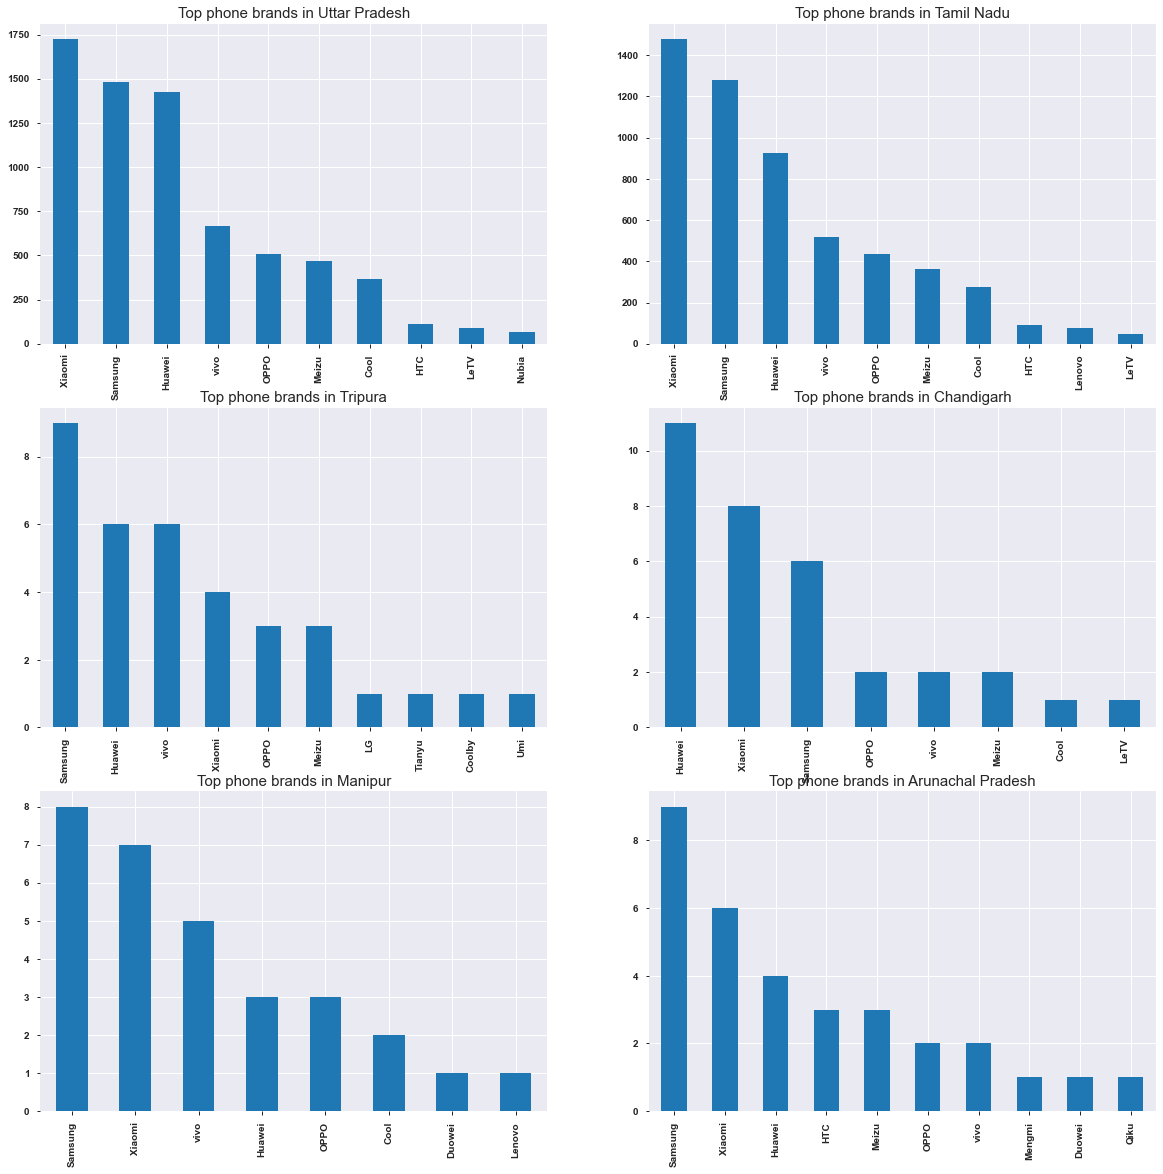

In [87]:
fig = plt.figure(figsize=(20,20))
i=1
for state in ageModelData.State.unique():
    fig.add_subplot(3,2,i)            #  subplot 1
    i=i+1
    ageModelData[ageModelData.State == state]['Mobile_Brand'].value_counts().sort_values( ascending = False)[0:10].plot(kind='bar')
    plt.title('Top phone brands in '+state ,size = 15)
   # plt.xlabel(state,fontsize=30)
plt.show()

**Observations :** Though it's the same brand sets which are popular in all the six states, Samsung is a leading brand in Manipur, Arunachal Pradesh and Tripura by few numbers. Huawei is more popular in Chandigarh.

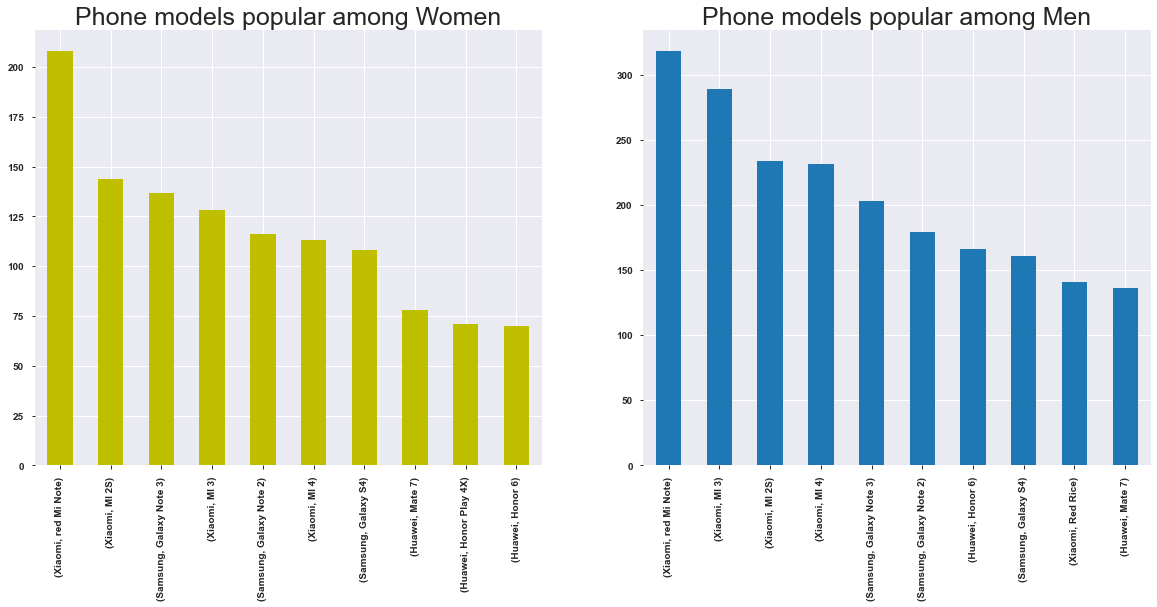

In [89]:
figure = plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
#ageModelData[ageModelData.Gender == 'F']['Mobile_Model'].value_counts().sort_values( ascending = False)[0:10].plot(kind='bar', color='r')
ageModelData[ageModelData.Gender == 'F'].groupby(['Mobile_Brand','Mobile_Model'])['Mobile_Brand'].count().nlargest(10).plot(kind='bar', color='y') 
plt.title('Phone models popular among Women',size = 25)
plt.xlabel('')
plt.subplot(1, 2, 2)
#ageModelData[ageModelData.Gender == 'M']['Mobile_Model'].value_counts().sort_values( ascending = False)[0:10].plot(kind='bar')
ageModelData[ageModelData.Gender == 'M'].groupby(['Mobile_Brand','Mobile_Model'])['Mobile_Brand'].count().nlargest(10).plot(kind='bar') 
plt.title('Phone models popular among Men',size = 25)
plt.xlabel('')
plt.show()


**Observation**: The top phone models popular among Men/Women are also almost same. Xiaomi has 4 models which are popular among Women and 5 models which are popular among men. They are: red Mi Note, MI2S, MI3, MI 4 and Red Rice. Samsung has 3 models each, Galaxy Note3, Galaxy Note2, Galaxy S4. Huawei has Mate7, Honor Play4X, Honor6. So there is no difference Male/Female choices of brands. They are almost same.

## Weekly and Hourly usage patterns:

In [77]:
df['Timestamp'] = pd.to_datetime(df.Timestamp)

In [78]:
#Addting hours column for analysis
df['Hours']  =df.Timestamp.dt.hour

In [79]:
df['Week_Day'] = df.Timestamp.dt.weekday

In [81]:
df.dtypes

Unnamed: 0                       int64
EventID                          int64
DeviceID                         int64
Timestamp               datetime64[ns]
Longitude                      float64
Latitude                       float64
Place                           object
State                           object
City_or_Municipality            object
Gender                          object
Age                              int64
Age_group                       object
Mobile_Brand                    object
Mobile_Model                    object
Hours                            int64
Week_Day                         int64
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127005 entries, 0 to 1127004
Data columns (total 16 columns):
Unnamed: 0              1127005 non-null int64
EventID                 1127005 non-null int64
DeviceID                1127005 non-null int64
Timestamp               1127005 non-null datetime64[ns]
Longitude               1127005 non-null float64
Latitude                1127005 non-null float64
Place                   1127005 non-null object
State                   1127005 non-null object
City_or_Municipality    1127005 non-null object
Gender                  1127005 non-null object
Age                     1127005 non-null int64
Age_group               1127005 non-null object
Mobile_Brand            1127005 non-null object
Mobile_Model            1127005 non-null object
Hours                   1127005 non-null int64
Week_Day                1127005 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 137.6+ MB


In [83]:
df.head()

,Unnamed: 0,EventID,DeviceID,Timestamp,Longitude,Latitude,Place,State,City_or_Municipality,Gender,Age,Age_group,Mobile_Brand,Mobile_Model,Hours,Week_Day
0,0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3,22,5
1,1,1355198,2973347786994914304,2016-05-01 01:35:45,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3,1,6
2,2,1630972,2973347786994914304,2016-05-03 00:07:34,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3,0,1
3,3,2732453,2973347786994914304,2016-05-01 06:15:59,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3,6,6
4,4,1562542,2973347786994914304,2016-05-01 20:34:19,77.225676,28.73014,Loni,Uttar Pradesh,Ghaziabad,M,35,M32-38,Umi,UIMI3,20,6


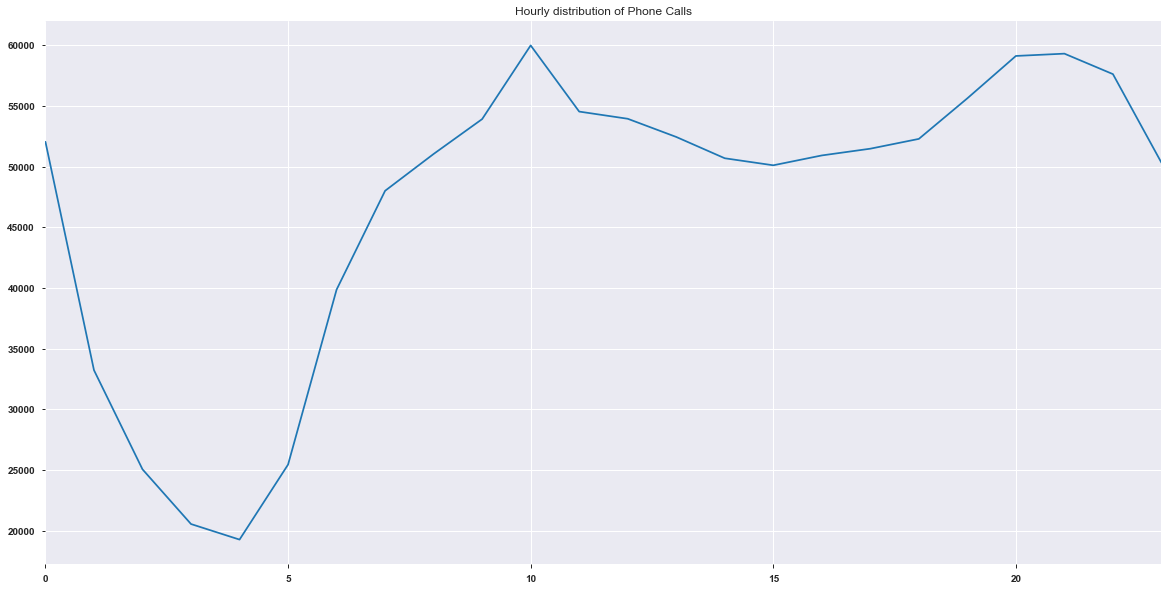

In [92]:
figure = plt.figure(figsize=[5, 5])
df.Hours.value_counts().sort_index().plot(figsize=(20,10),title='Hourly distribution of Phone Calls')

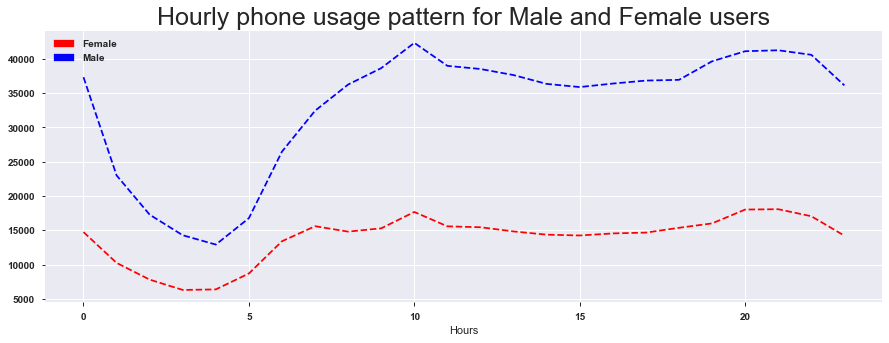

In [93]:
female_hourly_usage = df[df.Gender=='F'].Hours.value_counts().sort_index()
male_hourly_usage = df[df.Gender=='M'].Hours.value_counts().sort_index()
figure = plt.figure(figsize=[15, 5])
red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Hourly phone usage pattern for Male and Female users',size = 25)
plt.xlabel('Hours')
plt.plot(female_hourly_usage, 'r--', male_hourly_usage, 'b--')

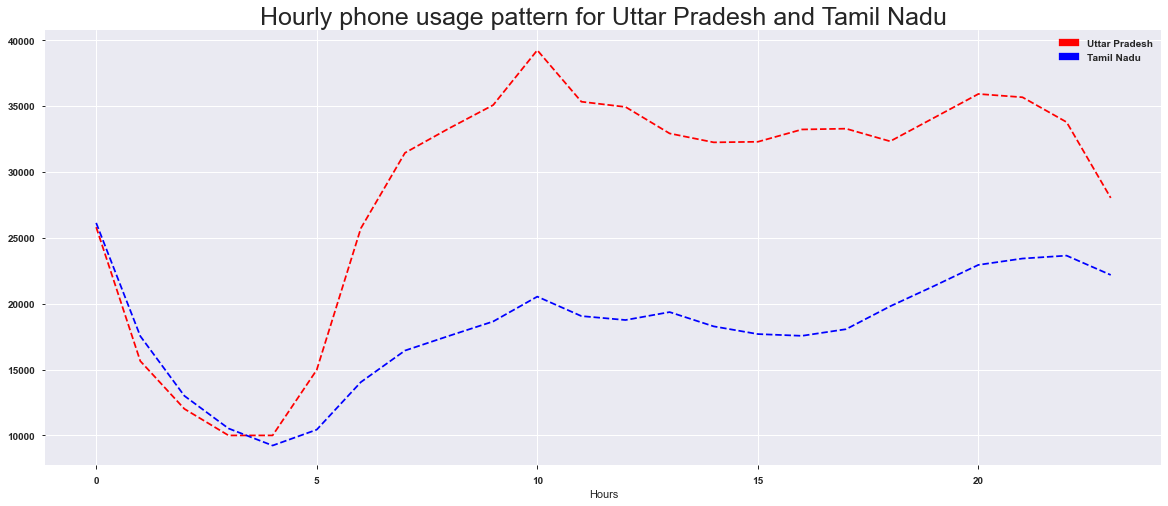

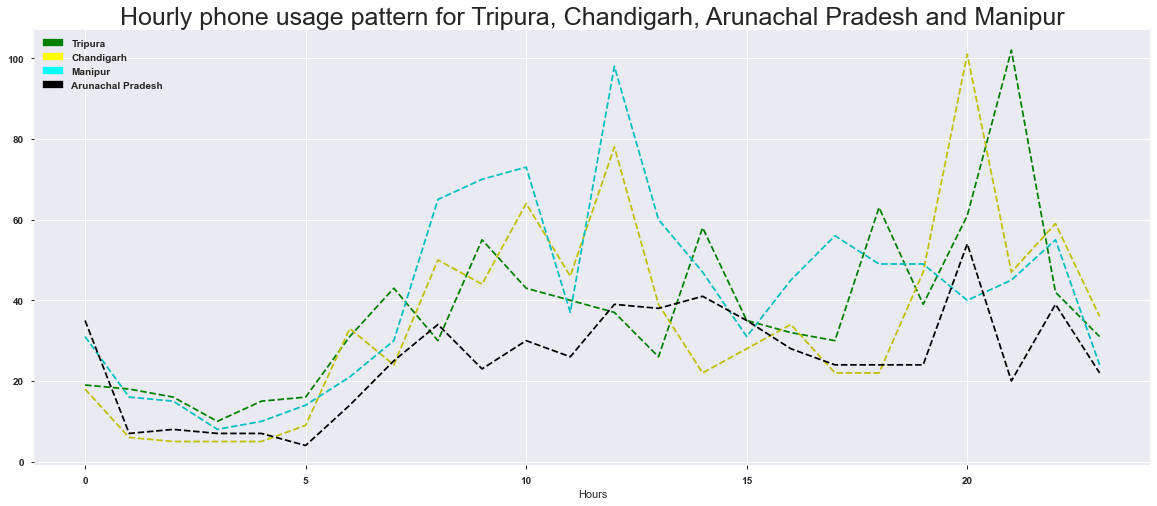

In [88]:

#====
hourly_usage_array = []
for state in ageModelData.State.unique():
    hourly_usage = df[df.State == state].Hours.value_counts().sort_index()
    hourly_usage_array.append(hourly_usage)
    
fig = plt.figure(figsize=[20, 8])
i=0
line_cols= ['r--','b--','g--','y--','c--','k--']
red_patch = mpatches.Patch(color='red', label=states[0])
blue_patch = mpatches.Patch(color='blue', label=states[1])
plt.legend(handles=[red_patch,blue_patch])
plt.title('Hourly phone usage pattern for Uttar Pradesh and Tamil Nadu',size = 25)
plt.xlabel('Hours')
plt.plot(hourly_usage_array[0], line_cols[0], hourly_usage_array[1], line_cols[1])

plt.show()

fig = plt.figure(figsize=[20, 8])
i=0
green_patch = mpatches.Patch(color='green', label=states[2])
yellow_patch = mpatches.Patch(color='yellow', label=states[3])
cyan_patch = mpatches.Patch(color='cyan', label=states[4])
black_patch = mpatches.Patch(color='black', label=states[5])

plt.legend(handles=[green_patch,yellow_patch,cyan_patch,black_patch])
plt.title('Hourly phone usage pattern for Tripura, Chandigarh, Arunachal Pradesh and Manipur',size = 25)
plt.xlabel('Hours')
plt.plot(hourly_usage_array[2], line_cols[2], hourly_usage_array[3], line_cols[3],hourly_usage_array[4],line_cols[4], hourly_usage_array[5], line_cols[5])
plt.show()


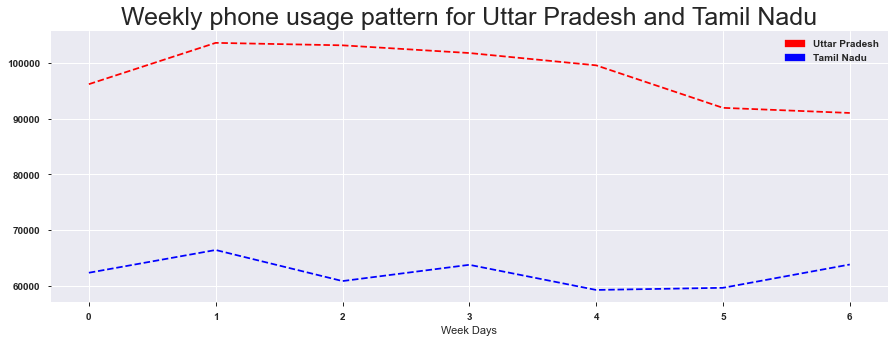

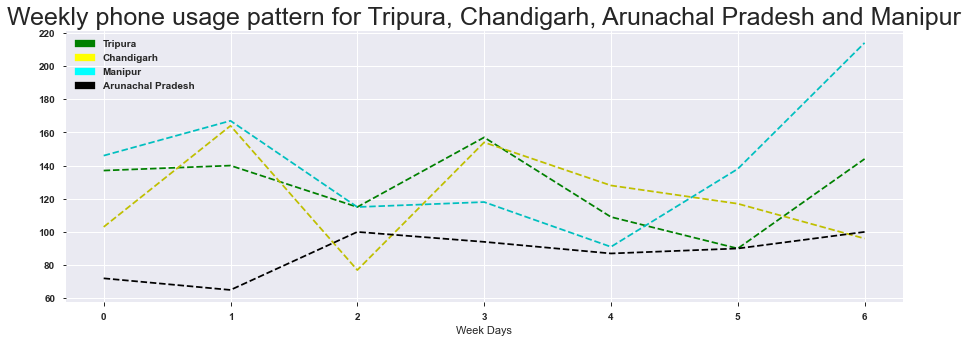

In [87]:
weekly_usage_array = []
states = ageModelData.State.unique()
for state in states:
    weekly_usage = df_merged_inner[df_merged_inner.State == state]['Week_Day'].value_counts().sort_index()
    weekly_usage_array.append(weekly_usage)
    
fig = plt.figure(figsize=[15, 5])
i=0
line_cols= ['r--','b--','g--','y--','c--','k--']

red_patch = mpatches.Patch(color='red', label=states[0])
blue_patch = mpatches.Patch(color='blue', label=states[1])
plt.legend(handles=[red_patch,blue_patch])
plt.title('Weekly phone usage pattern for Uttar Pradesh and Tamil Nadu',size = 25)
plt.xlabel('Week Days')
plt.plot(weekly_usage_array[0], line_cols[0], weekly_usage_array[1], line_cols[1])

plt.show()

fig = plt.figure(figsize=[15, 5])
blue_patch = mpatches.Patch(color='blue', label=states[1])
plt.legend(handles=[red_patch,blue_patch])


green_patch = mpatches.Patch(color='green', label=states[2])
yellow_patch = mpatches.Patch(color='yellow', label=states[3])
cyan_patch = mpatches.Patch(color='cyan', label=states[4])
black_patch = mpatches.Patch(color='black', label=states[5])

plt.legend(handles=[green_patch,yellow_patch,cyan_patch,black_patch])
i=0
plt.title('Weekly phone usage pattern for Tripura, Chandigarh, Arunachal Pradesh and Manipur',size = 25)
plt.xlabel('Week Days')
plt.plot(weekly_usage_array[2], line_cols[2], weekly_usage_array[3], line_cols[3],weekly_usage_array[4],line_cols[4], weekly_usage_array[5], line_cols[5])

plt.show()